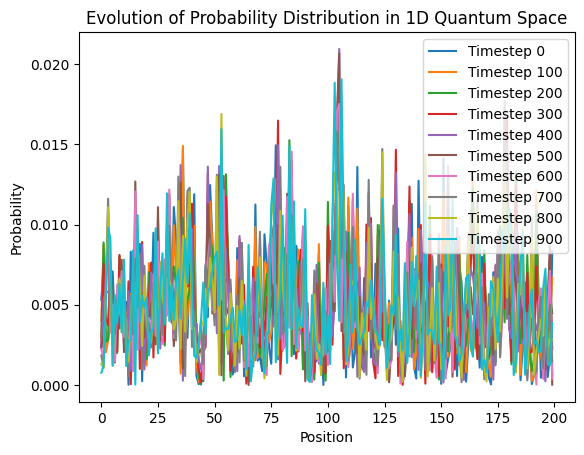

Chi-Square Statistic: 0.5150902559918342
Chi-Square p-value: 1.0
Kolmogorov-Smirnov Statistic: 0.04084047344364339
Kolmogorov-Smirnov p-value: 0.8787289548251919


/tmp/ipykernel_16503/1374950651.py:92: UserWarning: p-value capped: true value larger than 0.25. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad_stat, ad_p_value = anderson_ksamp([cdf_observed, cdf_expected])


ValueError: too many values to unpack (expected 2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, kstest, anderson, cramervonmises

# Enhanced parameters
n = 200  # Increase number of discrete positions
timesteps = 1000  # Increase number of observations
dx = 1.0  # Spatial resolution
dt = 0.005  # Smaller time step for better accuracy
hbar = 1.0  # Reduced Planck constant (normalized)
m = 1.0  # Mass of the particle (normalized)
potential = np.zeros(n)  # Potential energy, can be customized

# Initialize the wavefunction (complex)
initial_wavefunction = np.random.rand(n) + 1j * np.random.rand(n)
initial_wavefunction /= np.linalg.norm(initial_wavefunction)  # Normalize

# Initialize the probability density
probabilities = np.zeros((timesteps, n))
probabilities[0] = np.abs(initial_wavefunction) ** 2

# Define the Hamiltonian matrix
def construct_hamiltonian(n, dx, m, potential):
    H = np.zeros((n, n), dtype=np.complex_)
    for i in range(n):
        H[i, i] = potential[i]  # Potential energy
        if i > 0:
            H[i, i-1] = -hbar**2 / (2 * m * dx**2)
        if i < n - 1:
            H[i, i+1] = -hbar**2 / (2 * m * dx**2)
    return H

# Construct the Hamiltonian matrix
H = construct_hamiltonian(n, dx, m, potential)

# Time evolution operator (second-order Crank-Nicolson method for better accuracy)
def time_evolution_operator(H, dt, hbar):
    U = np.eye(n) - 1j * H * dt / (2 * hbar)
    return np.linalg.inv(np.eye(n) + 1j * H * dt / (2 * hbar)) @ U

# Simulate over time
for t in range(1, timesteps):
    U = time_evolution_operator(H, dt, hbar)
    initial_wavefunction = np.dot(U, initial_wavefunction)
    probabilities[t] = np.abs(initial_wavefunction) ** 2

# Plot the evolution of probabilities
for t in range(0, timesteps, int(timesteps/10)):  # Reduced number of steps to plot for clarity
    plt.plot(probabilities[t], label=f'Timestep {t}')
plt.title("Evolution of Probability Distribution in 1D Quantum Space")
plt.xlabel("Position")
plt.ylabel("Probability")
plt.legend()
plt.show()

# Statistical Tests
# Define the expected distribution (uniform distribution, normalized)
expected_distribution = np.ones(n) / n

# Chi-Square Test at final timestep
observed_probabilities = probabilities[-1]
# Adjust the expected distribution to match the sum of observed probabilities
expected_distribution_adjusted = np.ones(n) * np.sum(observed_probabilities) / n

# Perform the chi-square test
chi2_stat, chi2_p_value = chisquare(f_obs=observed_probabilities, f_exp=expected_distribution_adjusted)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"Chi-Square p-value: {chi2_p_value}")

# Kolmogorov-Smirnov Test (Comparing to uniform distribution)
# Convert to cumulative distribution for KS test
cumulative_observed = np.cumsum(observed_probabilities)
cumulative_expected = np.linspace(0, 1, n)

ks_stat, ks_p_value = kstest(cumulative_observed, 'uniform', args=(0, 1))

print(f"Kolmogorov-Smirnov Statistic: {ks_stat}")
print(f"Kolmogorov-Smirnov p-value: {ks_p_value}")

# Anderson-Darling Test (Comparing to uniform distribution)
# Since Anderson-Darling test doesn't support uniform directly, we can use a workaround
# We will use the CDF of the uniform distribution and compare it manually
# CDF of uniform distribution is simply a linear increase from 0 to 1

# Normalizing observed probabilities to get the CDF
cdf_observed = np.cumsum(observed_probabilities)
cdf_expected = np.linspace(0, 1, n)

# Use the 'anderson_ksamp' for comparing CDFs
from scipy.stats import anderson_ksamp
ad_stat, ad_p_value = anderson_ksamp([cdf_observed, cdf_expected])

print(f"Anderson-Darling Statistic: {ad_stat}")
print(f"Anderson-Darling p-value: {ad_p_value}")

# Cramér-von Mises Test (Comparing to uniform distribution)
# Normalize observed probabilities to get the CDF
cvm_stat = cramervonmises(cdf_observed, cdf_expected)

print(f"Cramér-von Mises Statistic: {cvm_stat}")
